# Forest Cover Type Prediction

## Descripción

El área de estudio incluye cuatro áreas silvestres situadas en el Bosque Nacional Roosevelt del norte de Colorado. Cada observación es un parche de 30m x 30m. Se le pide que prediga una clasificación entera para el tipo de cubierta forestal. Los siete tipos son:

    1 - Abeto rojo/abeto
    2 - Pino Lodgepole
    3 - Pino Ponderosa
    4 - Cottonwood/Willow
    5 - Aspen
    6 - Abeto de Douglas
    7 - Krummholz

El conjunto de entrenamiento (15120 observaciones) contiene ambas características y el Cover_Type. El conjunto de pruebas contiene sólo las características. Debe predecir el Cover_Type para cada fila del conjunto de test (565892 observaciones).

Campos de datos

    Elevación - Elevación en metros
    Aspecto - Aspecto en grados de azimut
    Pendiente - Pendiente en grados
    Distancia_Horz Dist a las características más cercanas de las aguas superficiales
    Distancia_vertical_a_hidrología - Vert Dist a las características más cercanas de las aguas superficiales
    Distancia horizontal a las carreteras - Horz Dist a la carretera más cercana
    Hillshade_9am (0 to 255 index) - Índice de Hillshade a las 9am, solsticio de verano
    Hillshade_Mediodía (0 a 255 índice) - Índice de Hillshade al mediodía, solsticio de verano
    Hillshade_3pm (0 a 255 índice) - Índice de Hillshade a las 3pm, solsticio de verano
    Distancia horizontal a los puntos de fuego - Horz Dist a los puntos de ignición más cercanos.
    Wilderness_Area (4 columnas binarias, 0 = ausencia o 1 = presencia) - Designación del área silvestre
    Tipo_de_suelo (40 columnas binarias, 0 = ausencia o 1 = presencia) - Designación del tipo de suelo
    Cover_Type (7 tipos, números enteros 1 a 7) - Cubierta forestal Designación del tipo

Las áreas silvestres son:

    1 - Zona silvestre de Rawah
    2 - Área silvestre de Neota
    3 - Área silvestre del Pico Comanche
    4 - Área silvestre de Cache la Poudre

Los tipos de suelo son:

    1 familia de catedrales - Complejo de afloramiento de rocas, extremadamente pedregoso.
    2 Vanet - Complejo de familias de ratones, muy pedregoso.
    3 Haploborolis - Complejo de afloramiento de rocas, muy pedregoso.
    4 Familia de las ratas - Complejo de afloramiento de rocas, de escombros.
    5 Familia Vanet - Complejo de afloramiento de rocas, rocoso.
    6 Vanet - Familia Wetmore - Complejo de afloramiento de rocas, rocoso.
    7 Familia gótica.
    8 Supervisor - Complejo de familias Limber, rocoso.
    9 Familia Troutville, muy pedregosa.
    10 Bullwark - Familias Catamount - Complejo de afloramiento de rocas, de escombros.
    11 Bullwark - Familias Catamount - Complejo de tierra rocosa, escombros.
    12 Familia Legault - Complejo de rocas, pedregoso.
    13 Familia Catamount - Terreno rocoso - Complejo de la familia Bullwark, escombros.
    14 Pachic Argiborolis - Complejo de Aquolis.
    15 no especificado en el estudio de suelos y ELU del USFS.
    16 Cryaquolis - Complejo de Cryoborolis.
    17 Familia Gateview - Complejo Cryaquolis.
    18 Familia Rogert, muy pedregosa.
    19 Típico de Cryaquolis - Complejo Borohemista.
    20 Típico de los Criaqueptos - Complejo típico de los Criaquolls.
    21 Típico de los Cryaquolls - familia Leighcan, complejo de till substratum.
    22 Familia Leighcan, hasta el sustrato, extremadamente pedregoso.
    23 Familia Leighcan, hasta el sustrato - Complejo típico de los criacuellos.
    24 Familia Leighcan, extremadamente pedregosa.
    25 Familia Leighcan, cálida, extremadamente pedregosa.
    26 Granile - Complejo de las familias Catamount, muy pedregoso.
    27 Familia Leighcan, cálida - Complejo de afloramiento de rocas, extremadamente pedregoso.
    28 Familia Leighcan - Complejo de afloramiento de rocas, extremadamente pedregoso.
    29 Como - Complejo de familias de Legault, extremadamente pedregoso.
    30 Familia Como - Terreno rocoso - Complejo familiar de Legault, extremadamente pedregoso.
    31 Leighcan - Complejo de familias de la Catamount, extremadamente pedregoso.
    32 Familia Catamount - Afloramiento de rocas - Complejo familiar de Leighcan, extremadamente pedregoso.
    33 Leighcan - Familias de las Catamonias - Complejo de afloramiento de rocas, extremadamente pedregoso.
    34 Cryorthents - Complejo rocoso, extremadamente pedregoso.
    35 Cryumbrepts - Complejo de afloramiento de rocas - Complejo de Cryaquepts.
    36 Familia Bross - Terreno rocoso - Complejo de criptas, extremadamente pedregoso.
    37 Afloramiento de rocas - Cripuertos - Complejo de Cryorthents, extremadamente pedregoso.
    38 Leighcan - Familia Moran - Complejo de criocuencas, extremadamente pedregoso.
    39 Familia Moran - Cryorthents - Complejo de la familia Leighcan, extremadamente pedregoso.
    40 Familia Moran - Cryorthents - Complejo rocoso, extremadamente pedregoso.

---

### Paquetes a importar

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

### Carga de datos del training

In [2]:
df_train = pd.read_csv('./train.csv')
df_train.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,2596,51,3,258,0,510,221,232,148,...,0,0,0,0,0,0,0,0,0,5
1,2,2590,56,2,212,-6,390,220,235,151,...,0,0,0,0,0,0,0,0,0,5
2,3,2804,139,9,268,65,3180,234,238,135,...,0,0,0,0,0,0,0,0,0,2
3,4,2785,155,18,242,118,3090,238,238,122,...,0,0,0,0,0,0,0,0,0,2
4,5,2595,45,2,153,-1,391,220,234,150,...,0,0,0,0,0,0,0,0,0,5


Numero de variables: 56
Numero de instancias: 15120
Clase a predecir: [1 2 3 4 5 6 7]


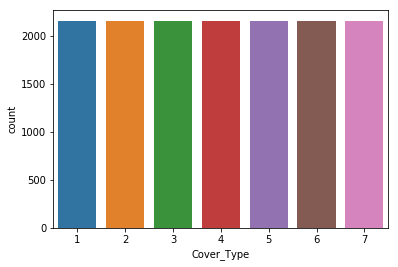

In [3]:
print('Numero de variables: {}'.format(df_train.shape[1]))
print('Numero de instancias: {}'.format(df_train.shape[0]))
print('Clase a predecir: {}'.format(np.sort(df_train['Cover_Type'].unique())))
sns.countplot(x='Cover_Type', data=df_train);

In [4]:
df_train.describe()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,15120.00000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,...,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000
mean,7560.50000,2749.322553,156.676653,16.501587,227.195701,51.076521,1714.023214,212.704299,218.965608,135.091997,...,0.045635,0.040741,0.001455,0.006746,0.000661,0.002249,0.048148,0.043452,0.030357,4.000000
std,4364.91237,417.678187,110.085801,8.453927,210.075296,61.239406,1325.066358,30.561287,22.801966,45.895189,...,0.208699,0.197696,0.038118,0.081859,0.025710,0.047368,0.214086,0.203880,0.171574,2.000066
min,1.00000,1863.000000,0.000000,0.000000,0.000000,-146.000000,0.000000,0.000000,99.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,3780.75000,2376.000000,65.000000,10.000000,67.000000,5.000000,764.000000,196.000000,207.000000,106.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,7560.50000,2752.000000,126.000000,15.000000,180.000000,32.000000,1316.000000,220.000000,223.000000,138.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,11340.25000,3104.000000,261.000000,22.000000,330.000000,79.000000,2270.000000,235.000000,235.000000,167.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
max,15120.00000,3849.000000,360.000000,52.000000,1343.000000,554.000000,6890.000000,254.000000,254.000000,248.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


In [23]:
#Tipos de datos
#df_train.dtypes # Son todos de tipo int64

In [24]:
#Comprobación de nulos
#np.sum(df_train.isna()) # No presenta nulos o valores perdidos

In [25]:
#Eliminación del id ya que no aporta nada
if 'Id' in df_train.columns.tolist():
    df_train.drop(columns='Id', inplace=True)

In [26]:
columns = df_train.columns[:5].tolist()
columns.append('Cover_Type')

In [27]:
columns

['Elevation',
 'Aspect',
 'Slope',
 'Horizontal_Distance_To_Hydrology',
 'Vertical_Distance_To_Hydrology',
 'Cover_Type']

/Users/cristian/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/cristian/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


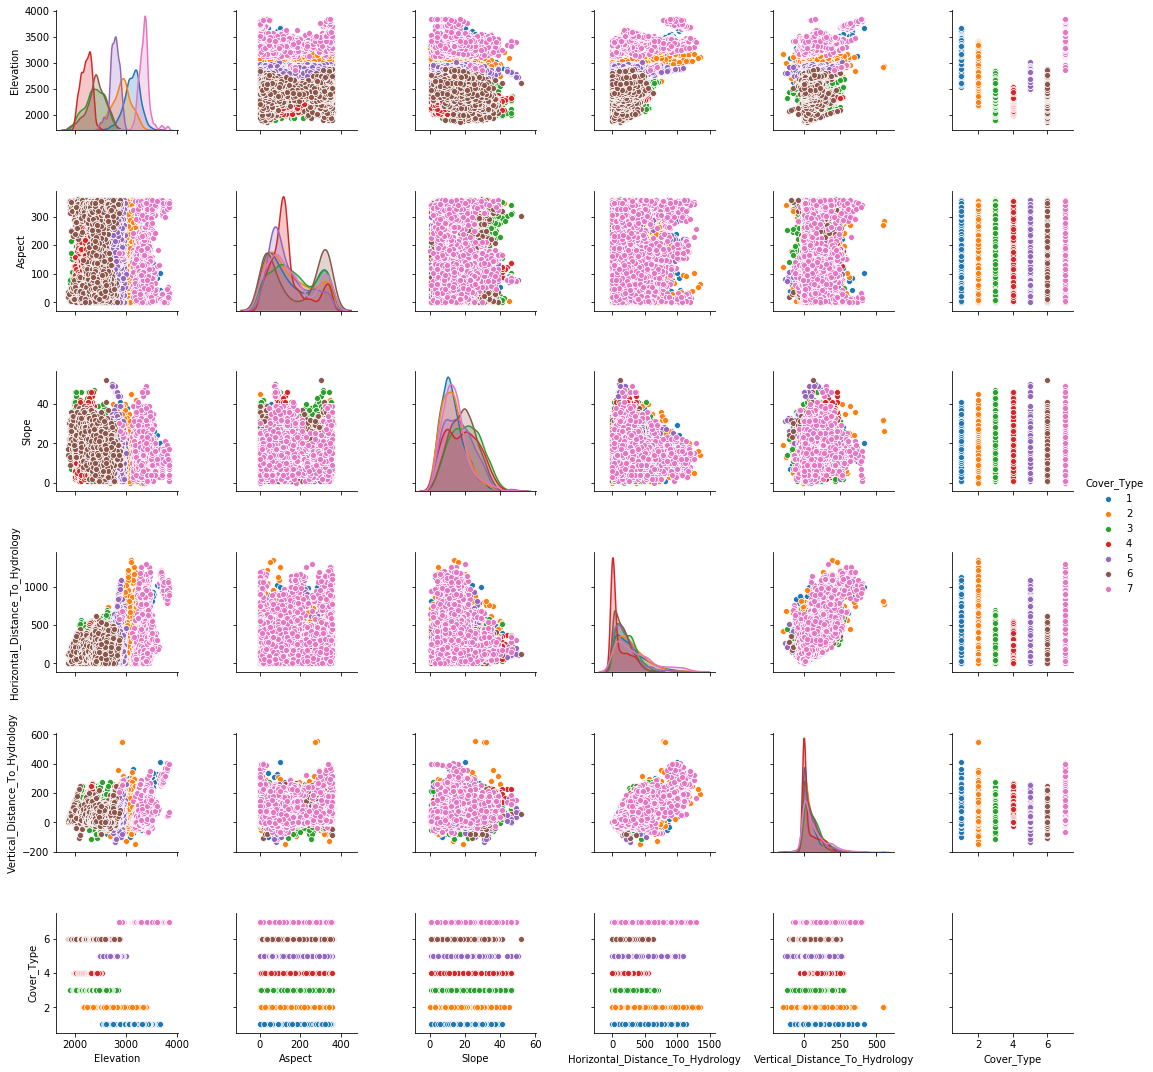

In [22]:
sns.pairplot(df_train[columns], hue="Cover_Type");